In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [2]:
cancer = load_breast_cancer()

In [3]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
cancer.data.shape

(569, 30)

In [5]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [6]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [7]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [8]:
# 데이터 분할 
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   stratify=cancer.target,
                                                   random_state=42)

In [9]:
# 모델링/학습 
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [10]:
#평가 
tree.score(X_train, y_train), tree.score(X_test, y_test)  #오버피팅 

(1.0, 0.9370629370629371)

In [11]:
tree.tree_.max_depth

7

### Tree의 복잡도 제어 

In [12]:
# 모델링/학습 
tree = DecisionTreeClassifier(random_state=0, max_depth=4)    # depth=5 이하 
tree.fit(X_train, y_train)

#평가 
tree.score(X_train, y_train), tree.score(X_test, y_test)

(0.9882629107981221, 0.951048951048951)

### 시각화

In [13]:
### graphviz 
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='tree.dot', class_names=['cancer','normal'],
               feature_names=cancer.feature_names, impurity=False, filled=True)

### 트리 특성중요도

In [14]:
tree.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01019737, 0.04839825, 0.        , 0.        , 0.0024156 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.72682851, 0.0458159 , 0.        , 0.        , 0.0141577 ,
       0.        , 0.018188  , 0.1221132 , 0.01188548, 0.        ])

In [15]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [17]:
cancer.feature_names[tree.feature_importances_ != 0]

array(['radius error', 'texture error', 'smoothness error',
       'worst radius', 'worst texture', 'worst smoothness',
       'worst concavity', 'worst concave points', 'worst symmetry'],
      dtype='<U23')

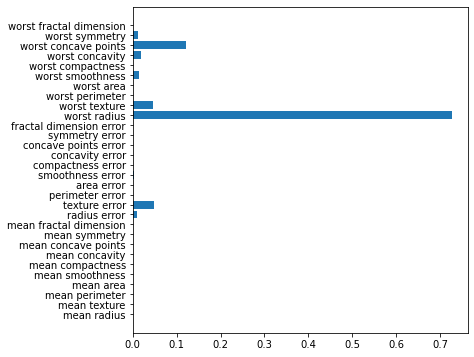

In [21]:
import matplotlib.pyplot as plt 
import numpy as np

def plot_feature(model):
    plt.figure(figsize=(6,6))
    n_features = cancer.data.shape[1]  #30개 
    plt.barh(range(n_features), model.feature_importances_)
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.show() 
plot_feature(tree)

### RandomForest 적용

In [24]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=2)
forest.fit(X_train, y_train)
forest.score(X_train, y_train), forest.score(X_test,y_test)

(1.0, 0.958041958041958)

In [28]:
forest = RandomForestClassifier(random_state=2,n_estimators=300, max_depth=3)
forest.fit(X_train, y_train)
forest.score(X_train, y_train), forest.score(X_test,y_test)

(0.9835680751173709, 0.958041958041958)

### GradientBoosting

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train, y_train)
gb.score(X_train, y_train), gb.score(X_test, y_test)

(1.0, 0.958041958041958)

In [32]:
### 매개변수 조정 
gb = GradientBoostingClassifier(random_state=0, max_depth=1)
gb.fit(X_train, y_train)
gb.score(X_train, y_train), gb.score(X_test, y_test)

(0.9882629107981221, 0.958041958041958)

In [35]:
### 매개변수 조정 
gb = GradientBoostingClassifier(random_state=0, learning_rate=0.05, n_estimators=100,
                               max_depth=2)
gb.fit(X_train, y_train)
gb.score(X_train, y_train), gb.score(X_test, y_test)

(0.9953051643192489, 0.9440559440559441)

### 최적의 매개변수 찾기 

In [36]:
#GridSearch -> CV = cross validation 교차검증 
from sklearn.model_selection import GridSearchCV

param_list = {'max_depth':[1,2,3,4,5], 'n_estimators':[50, 100,200,300],
              'learning_rate':[0.001, 0.01, 0.1, 1]}
gs = GridSearchCV(gb, param_list, cv=5)
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(learning_rate=0.05,
                                                  max_depth=2, random_state=0),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1],
                         'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [50, 100, 200, 300]})

In [37]:
gs.best_params_

{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 300}

In [38]:
gs.best_score_   #train 정확도 

0.9741723666210671

In [39]:
gs.best_estimator_    #제일 좋은 param 으로 학습된모델

GradientBoostingClassifier(max_depth=1, n_estimators=300, random_state=0)

In [40]:
### test 정확도 
gs.score(X_test, y_test)

0.965034965034965